In [1]:
# https://www.kaggle.com/crowdflower/twitter-airline-sentiment
!wget -nc https://lazyprogrammer.me/course_files/AirlineTweets.csv

--2024-04-18 12:24:41--  https://lazyprogrammer.me/course_files/AirlineTweets.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3421431 (3.3M) [text/csv]
Saving to: ‘AirlineTweets.csv’

AirlineTweets.csv   100%[===================>]   3.26M  3.29MB/s    in 1.0s    

2024-04-18 12:24:44 (3.29 MB/s) - ‘AirlineTweets.csv’ saved [3421431/3421431]



In [2]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

np.random.seed(1)

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [3]:
df_ = pd.read_csv('AirlineTweets.csv')

In [4]:
df_.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [5]:
df = df_[['airline_sentiment', 'text']].copy()

In [6]:
df.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


<Axes: >

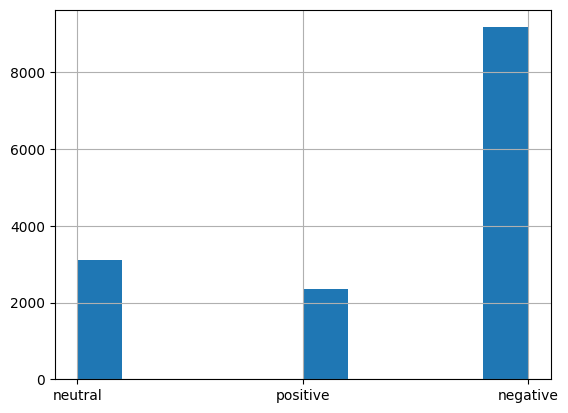

In [7]:
df['airline_sentiment'].hist()

In [8]:
target_map = {'positive': 1, 'negative': 0, 'neutral': 2}
df['target'] = df['airline_sentiment'].map(target_map)

In [9]:
df.head()

,airline_sentiment,text,target
0,neutral,@VirginAmerica What @dhepburn said.,2
1,positive,@VirginAmerica plus you've added commercials t...,1
2,neutral,@VirginAmerica I didn't today... Must mean I n...,2
3,negative,@VirginAmerica it's really aggressive to blast...,0
4,negative,@VirginAmerica and it's a really big bad thing...,0


In [10]:
df_train, df_test = train_test_split(df)

In [11]:
df_train.head()

,airline_sentiment,text,target
1041,negative,@united Change made in just over 3 hours. For ...,0
1989,negative,@united The engineer that designed the 787 doo...,0
14309,negative,"@AmericanAir 11 out of 11 delayed flights, you...",0
1711,negative,@united ouch not fair,0
11542,negative,@USAirways stuck in cae need reFlight Booking ...,0


In [12]:
vectorizer = TfidfVectorizer(max_features=2000)

In [13]:
X_train = vectorizer.fit_transform(df_train['text'])

In [14]:
X_train

<10980x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 157849 stored elements in Compressed Sparse Row format>

In [15]:
X_test = vectorizer.transform(df_test['text'])

In [17]:
Y_train = df_train['target']
Y_test = df_test['target']

In [19]:
model = LogisticRegression(max_iter=500)
model.fit(X_train, Y_train)
print("Train acc:", model.score(X_train, Y_train))
print("Test acc:", model.score(X_test, Y_test))

Train acc: 0.8550091074681239
Test acc: 0.7975409836065573


In [22]:
Pr_train = model.predict_proba(X_train)#[:, 1]
Pr_test = model.predict_proba(X_test)#[:, 1]
print("Train AUC:", roc_auc_score(Y_train, Pr_train, multi_class='ovo'))
print("Test AUC:", roc_auc_score(Y_test, Pr_test, multi_class='ovo'))

Train AUC: 0.9429606708355508
Test AUC: 0.8951756016888656


In [23]:
P_train = model.predict(X_train)
P_test = model.predict(X_test)

In [24]:
cm = confusion_matrix(Y_train, P_train, normalize='true')
cm

array([[0.96558734, 0.00813126, 0.0262814 ],
       [0.20248869, 0.69626697, 0.10124434],
       [0.30064516, 0.0511828 , 0.64817204]])

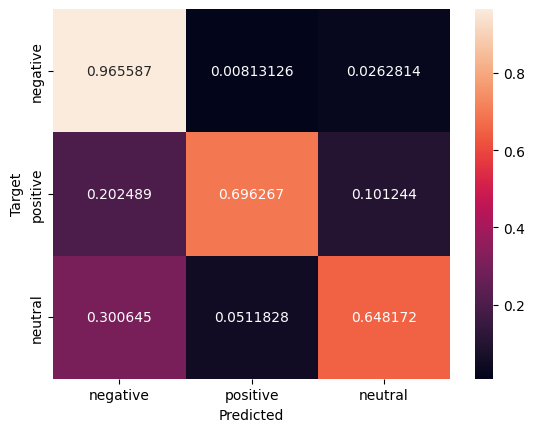

In [25]:
# Scikit-Learn is transitioning to V1 but it's not available on Colab
# The changes modify how confusion matrices are plotted
def plot_cm(cm):
    classes = ['negative', 'positive', 'neutral']
    df_cm = pd.DataFrame(cm, index=classes, columns=classes)
    ax = sn.heatmap(df_cm, annot=True, fmt='g')
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Target")
    
plot_cm(cm)

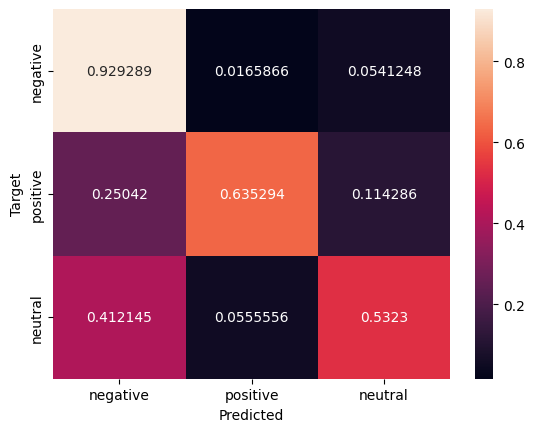

In [26]:
cm_test = confusion_matrix(Y_test, P_test, normalize='true')
plot_cm(cm_test)

# Binary Labels & Model Interpretation

In [27]:
binary_target_list = [target_map['positive'], target_map['negative']]
df_b_train = df_train[df_train['target'].isin(binary_target_list)]
df_b_test = df_test[df_test['target'].isin(binary_target_list)]

In [28]:
df_b_train.head()

,airline_sentiment,text,target
1041,negative,@united Change made in just over 3 hours. For ...,0
1989,negative,@united The engineer that designed the 787 doo...,0
14309,negative,"@AmericanAir 11 out of 11 delayed flights, you...",0
1711,negative,@united ouch not fair,0
11542,negative,@USAirways stuck in cae need reFlight Booking ...,0


In [30]:
X_train = vectorizer.fit_transform(df_b_train['text'])
X_test = vectorizer.transform(df_b_test['text'])

In [31]:
Y_train = df_b_train['target']
Y_test = df_b_test['target']

In [32]:
model = LogisticRegression(max_iter=500)
model.fit(X_train, Y_train)
print("Train acc:", model.score(X_train, Y_train))
print("Test acc:", model.score(X_test, Y_test))

Train acc: 0.9305603697284807
Test acc: 0.9158004158004158


In [33]:
Pr_train = model.predict_proba(X_train)[:, 1]
Pr_test = model.predict_proba(X_test)[:, 1]
print("Train AUC:", roc_auc_score(Y_train, Pr_train))
print("Test AUC:", roc_auc_score(Y_test, Pr_test))

Train AUC: 0.9790085031343071
Test AUC: 0.9534029762057595


In [34]:
model.coef_

array([[-0.24988098, -0.13571672, -0.33709423, ...,  0.51937251,
         0.00756198, -0.59833895]])

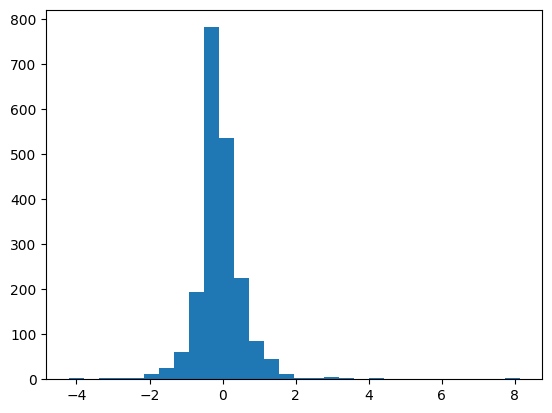

In [35]:
plt.hist(model.coef_[0], bins=30);

In [36]:
word_index_map = vectorizer.vocabulary_
word_index_map

{'united': 1843,
 'change': 337,
 'made': 1093,
 'in': 938,
 'just': 992,
 'over': 1274,
 'hours': 903,
 'for': 745,
 'something': 1622,
 'that': 1731,
 'should': 1576,
 'have': 855,
 'taken': 1705,
 'online': 1249,
 'am': 139,
 'not': 1216,
 'loved': 1082,
 'the': 1733,
 'agent': 112,
 'though': 1749,
 'door': 567,
 'to': 1769,
 'half': 831,
 'into': 965,
 'plane': 1336,
 'seat': 1536,
 'be': 235,
 'forced': 746,
 'always': 138,
 'sit': 1594,
 'here': 876,
 'americanair': 143,
 '11': 6,
 'out': 1269,
 'of': 1230,
 'delayed': 498,
 'flights': 728,
 'you': 1991,
 'suck': 1678,
 'and': 148,
 'getting': 794,
 'worse': 1967,
 'fair': 669,
 'usairways': 1862,
 'stuck': 1674,
 'need': 1194,
 'reflight': 1438,
 'booking': 269,
 'problems': 1382,
 'next': 1202,
 'flight': 717,
 'possibly': 1361,
 'dm': 554,
 'more': 1169,
 'info': 952,
 'southwestair': 1633,
 'got': 813,
 'help': 870,
 'from': 765,
 'nice': 1204,
 'lady': 1010,
 'on': 1244,
 'phone': 1320,
 'thank': 1728,
 'refund': 1439,
 'vo

In [37]:
# let's look at the weights for each word
# try it with different threshold values!
threshold = 2

print("Most positive words:")
for word, index in word_index_map.items():
    weight = model.coef_[0][index]
    if weight > threshold:
        print(word, weight)

Most positive words:
southwestair 2.832474781174858
thank 8.067308899423246
great 5.219446559675598
best 3.609036554516933
virginamerica 3.2593990659020355
thx 2.799518511037562
jetblue 3.044094936743573
good 3.2335834783560538
thanks 8.12704429937926
love 4.3803543555818125
appreciate 2.92839266278773
awesome 4.060177377782699
cool 2.1295332407565923
kudos 2.6559440127360516
amazing 4.22243590149141
worries 2.738571208235924
wonderful 2.1200933418182317


In [38]:
print("Most negative words:")
for word, index in word_index_map.items():
    weight = model.coef_[0][index]
    if weight < -threshold:
        print(word, weight)

Most negative words:
hours -3.170742412881641
not -4.213694104208376
delayed -2.694935403514512
hour -2.045253860038389
but -2.2087265582294493
cancelled -2.6674871281407935
nothing -2.0920808261679262
no -3.9329743923719773
worst -3.1867274240311865
hold -2.7789825125171124
why -2.193718395916134
doesn -2.0070043953328494
luggage -2.175826766102778


In [39]:
# Exercise: print the most-wrong tweets for both classes
# i.e. find a negative review where p(y = 1 | x) is closest to 1 
#      find a positive review where p(y = 1 | x) is closest to 0

# Exercise: set class_weight='balanced'